In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [13]:
df = pd.read_csv("spacex_dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.6,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch.

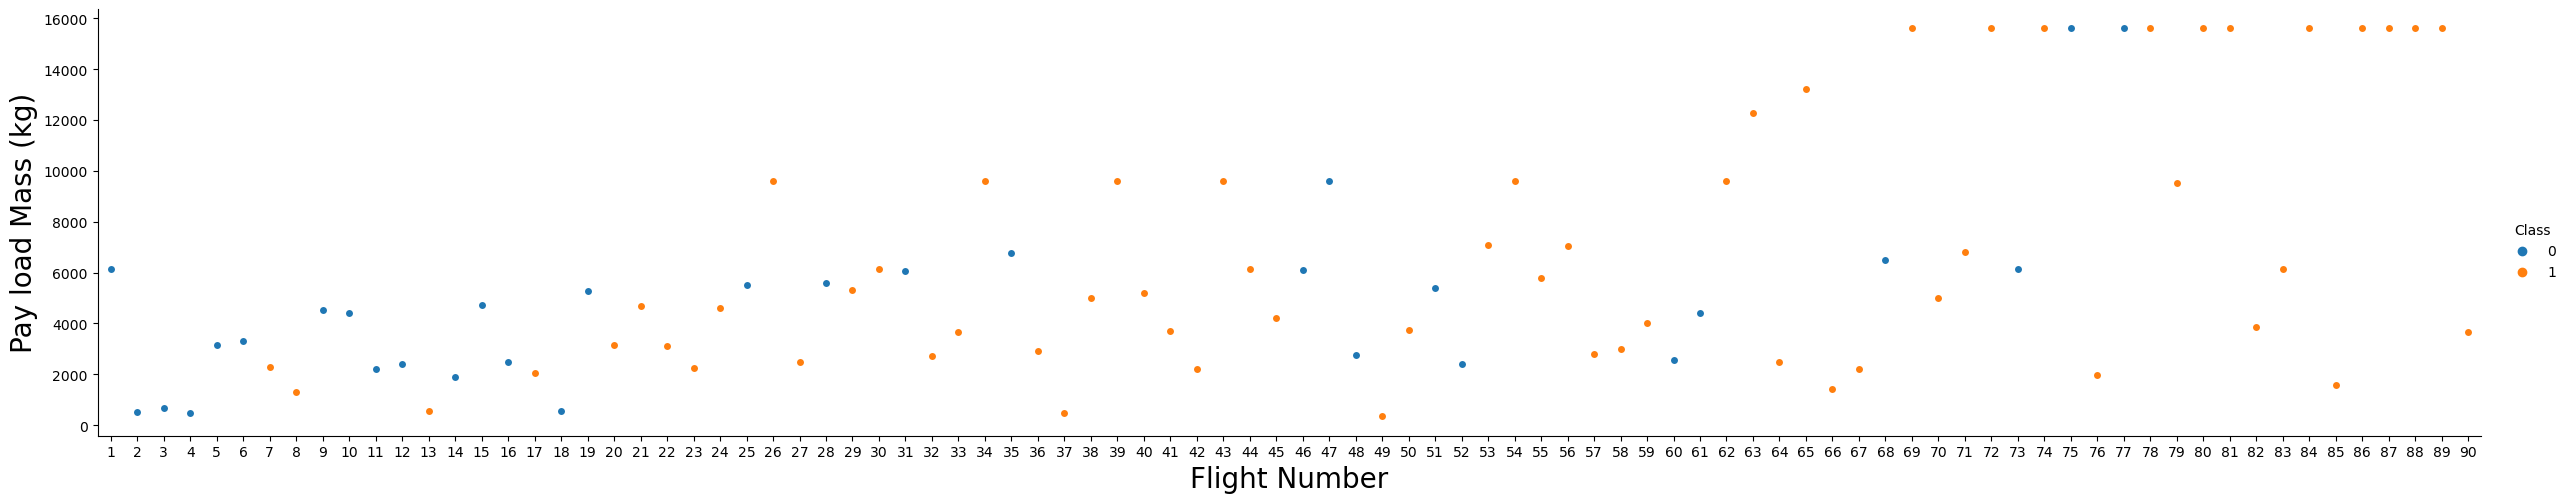

In [16]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

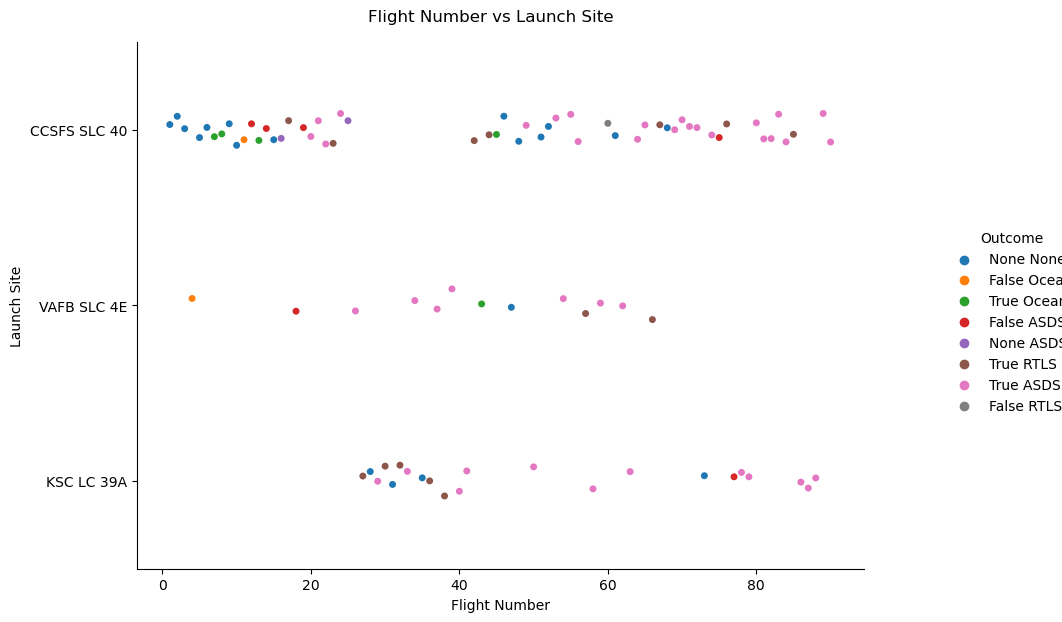

In [25]:
#Visualize the relationship between Flight Number and Launch Site

# Create the categorical plot
cat_plot = sns.catplot(
    data=df, 
    x='FlightNumber', 
    y='LaunchSite', 
    hue='Outcome', 
    kind='strip', 
    height=6, 
    aspect=1.5
)

# Set the title and labels
cat_plot.fig.suptitle('Flight Number vs Launch Site', y=1.03)
cat_plot.set_axis_labels('Flight Number', 'Launch Site')

# Move the legend outside the plot
cat_plot._legend.set_bbox_to_anchor((1.05, 0.5))

# Display the plot
plt.show()

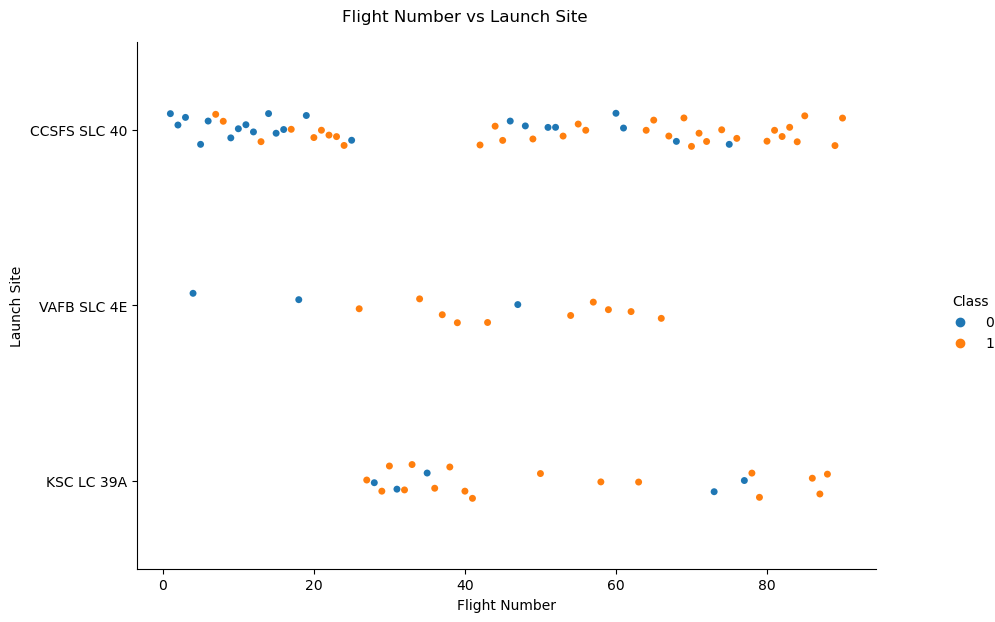

In [70]:
# Create the categorical plot
cat_plot = sns.catplot(
    data=df, 
    x='FlightNumber', 
    y='LaunchSite', 
    hue='Class', 
    kind='strip', 
    height=6, 
    aspect=1.5
)

# Set the title and labels
cat_plot.fig.suptitle('Flight Number vs Launch Site', y=1.03)
cat_plot.set_axis_labels('Flight Number', 'Launch Site')

# Move the legend outside the plot
cat_plot._legend.set_bbox_to_anchor((1.05, 0.5))

# Display the plot
plt.show()

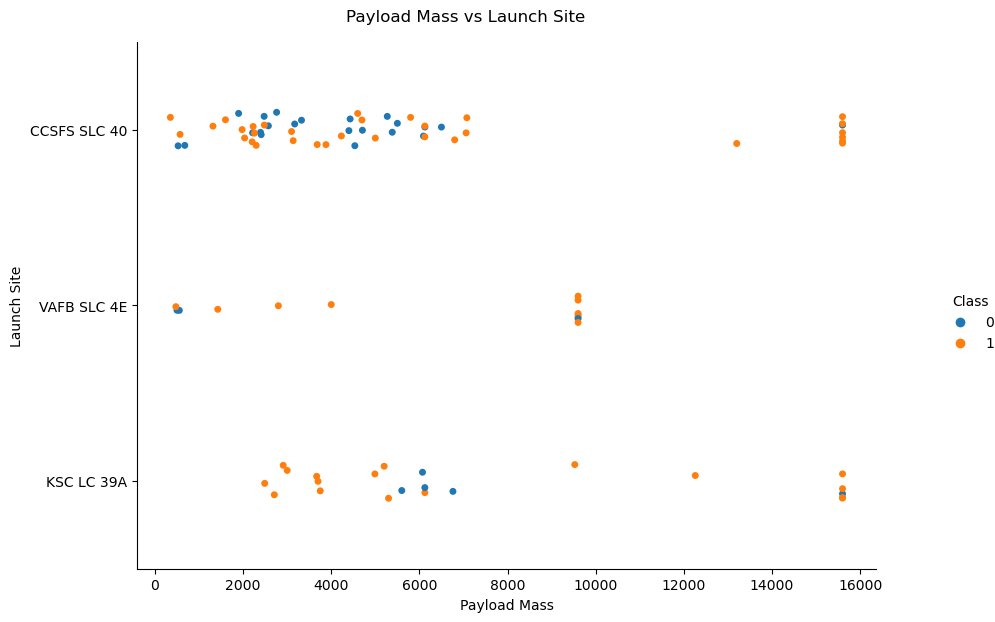

In [31]:
#Visualize the relationship between Payload and Launch Site

# Create the categorical plot
cat_plot = sns.catplot(
    data=df, 
    x='PayloadMass', 
    y='LaunchSite', 
    hue='Class', 
    kind='strip', 
    height=6, 
    aspect=1.5
)

# Set the title and labels
cat_plot.fig.suptitle('Payload Mass vs Launch Site', y=1.03)
cat_plot.set_axis_labels('Payload Mass', 'Launch Site')

# Move the legend outside the plot
cat_plot._legend.set_bbox_to_anchor((1.05, 0.5))

# Display the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

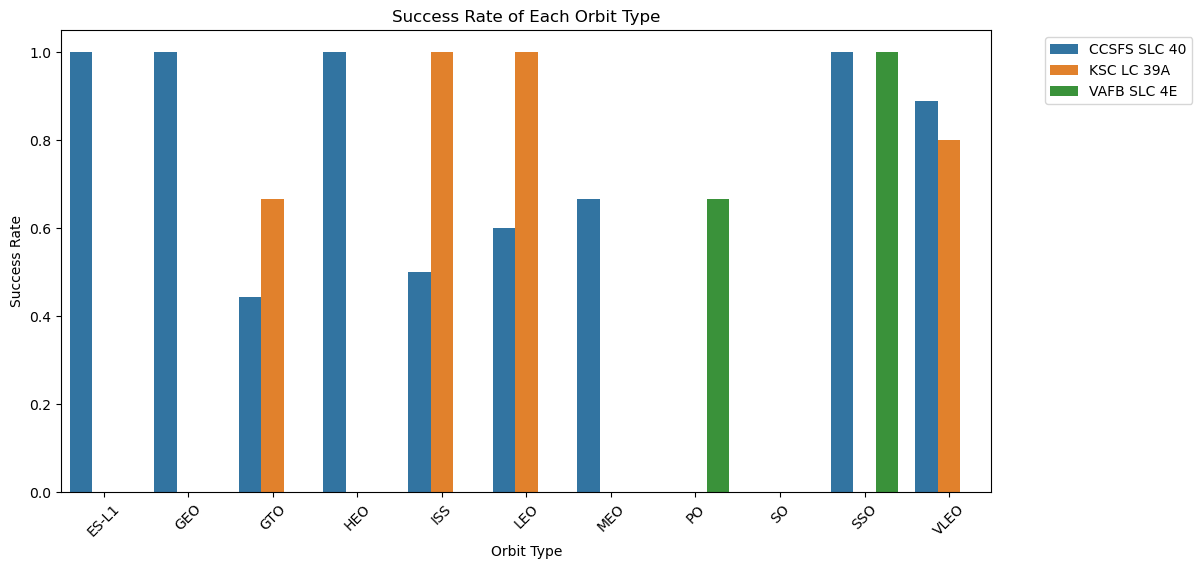

In [34]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Calculate the success rate for each orbit type
# Assuming 'class' column contains 1 for success and 0 for failure
orbit_success = df.groupby(['Orbit', 'LaunchSite'])['Class'].mean().reset_index()
orbit_success.rename(columns={'Class': 'SuccessRate'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success, x='Orbit', y='SuccessRate', hue='LaunchSite')

# Set the title and labels
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

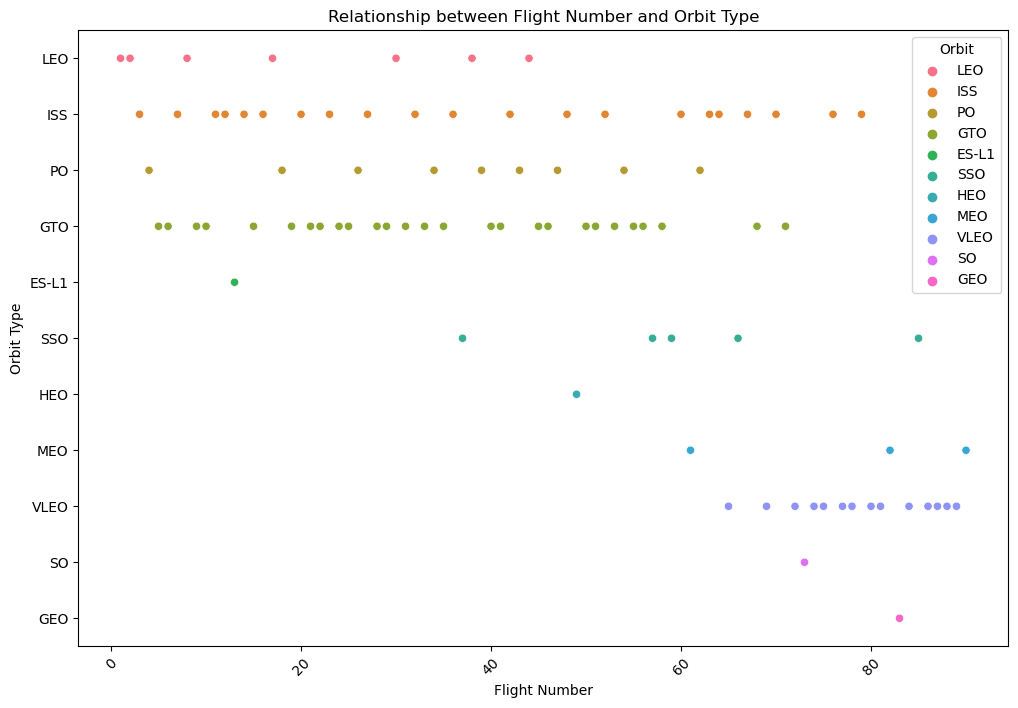

In [38]:
# Visualize the relationship between FlightNumber and Orbit type
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit')

# Set the title and labels
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')

# Rotate the x ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

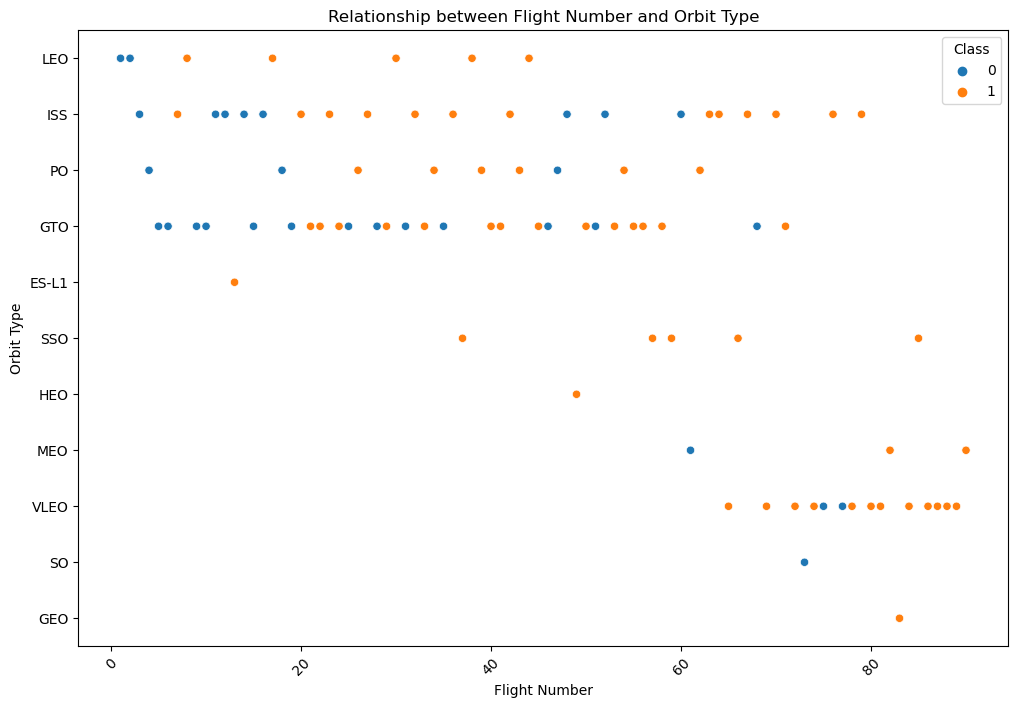

In [41]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')

# Set the title and labels
plt.title('Relationship between Flight Number and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')

# Rotate the x ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit

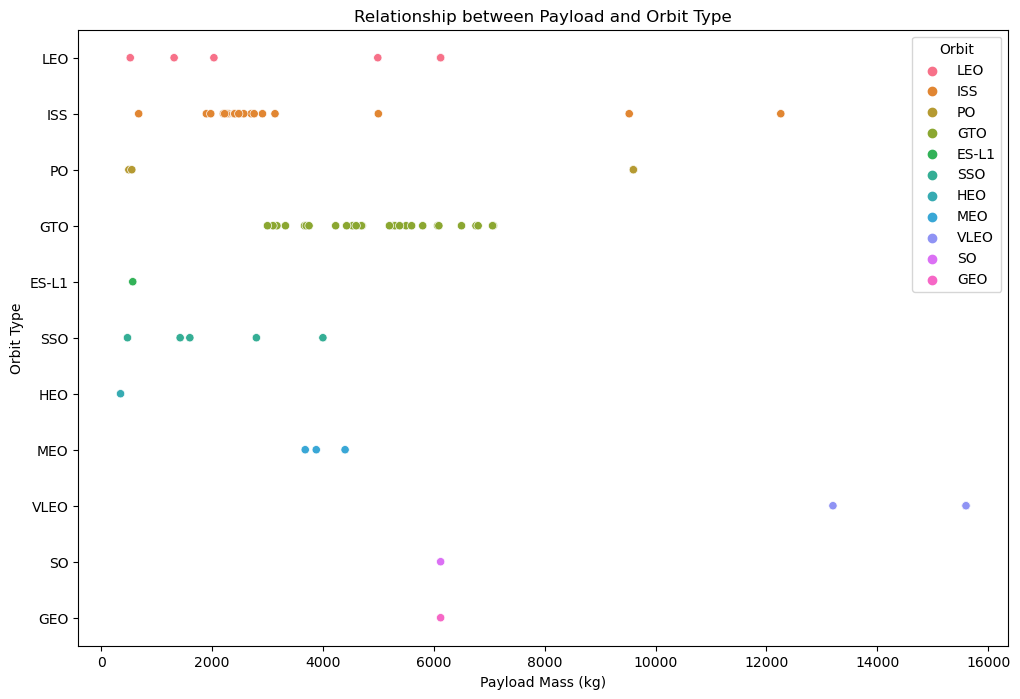

In [44]:
# Visualize the relationship between Payload and Orbit type
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Orbit')

# Set the title and labels
plt.title('Relationship between Payload and Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')

# Show the plot
plt.show()

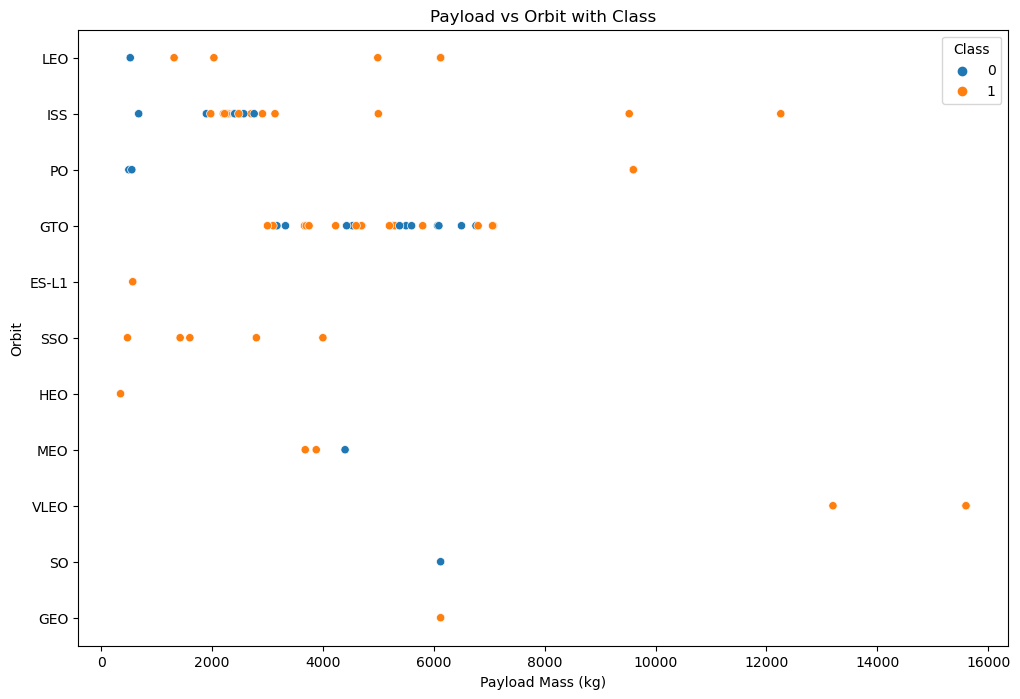

In [46]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')

# Set the title and labels
plt.title('Payload vs Orbit with Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

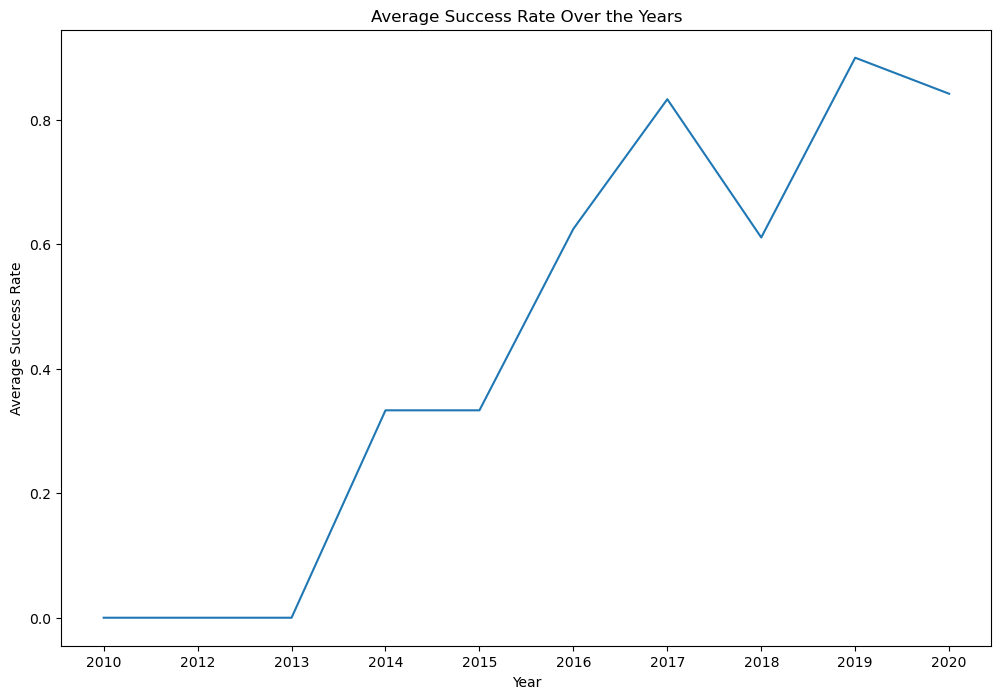

In [49]:
# A function to Extract years from the date
def Extract_year(date):
    return date.split("-")[0]

# Apply the function to extract the year
df['Year'] = df['Date'].apply(Extract_year)

# Calculate the average success rate for each year
avg_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a line plot
sns.lineplot(data=avg_success_rate, x='Year', y='Class')

# Set the title and labels
plt.title('Average Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')

# Show the plot
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

# Features Engineering

In [53]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.6,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [57]:
# Apply one-hot encoding to the specified columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting dataframe
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.6,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.0,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype(float)

# Display the data types of the dataframe after casting
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [63]:
features_one_hot.to_csv('spacex_dataset_part_3.csv', index=False)